# Análise de Sistemas em Tempo Contínuo com a Transformada de Laplace

A transformada de Laplace é uma ferramenta importante no estudo de sistemas lineares invariantes no tempo. É frequentemente utilizada ao resolver equações diferenciais ou sistemas de equações diferenciais,  determinar a estabilidade, controlabilidade e observabilidade de sistemas, etc.

## A Transformada de Laplace

Seja uma função $f(t)$. A Transformada de Fourier de $f(t)$ descreve o conteúdo espectral no domínio da frequência e é dada por

$$F(j\omega)=\mathscr{F}(f(t))=\int_{-\infty}^{\infty}f(t)e^{-j\omega t}\,dt$$

Definimos uma nova função derivada de $f(t)$ como

$$f_s(t)=e^{-\sigma t}f(t)$$

onde  $\sigma$ representa a taxa na qual o sinal é amortecido no tempo. Portanto,


$$\mathscr{F}(f_s(t))=\int_{-\infty}^{\infty}f(t)e^{-\sigma t}e^{-j\omega t}\,dt=\int_{-\infty}^{\infty}f(t)e^{-st}\,dt.$$

Na equação acima $s=\sigma +j\omega$ é denominada frequência complexa, e a ultima integral à direita é a transformada de Laplace  de $f(t)$, escrita como

\begin{equation*}
F(s)=\mathcal{L}(f(t))=\int_{-\infty}^{\infty}f(t)e^{-st}\,dt.
\label{} \tag{1}
\end{equation*}

Por outro lado, a transformada de Fourier inversa de $F(s)$ é

$$f_s(t)=e^{-\sigma t}f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}F(s)e^{j\omega t}\,d\omega.$$

Como $ds=jd\omega\,(\sigma\, \mbox{é constante})$, da última igualdade acima escrevemos a Transformada Inversa de Laplace como

\begin{equation*}
f(t)=\mathcal{L}^{-1}(F(s))=\frac{1}{j2\pi}\int_{\sigma-j\infty}^{\sigma+j\infty}F(s)e^{st}\,ds.
\label{}\tag{2}
\end{equation*}

A equação (1) é a transformada de Laplace bilateral. Para sistemas causais, $f(t)=0\;\mbox{para}\;t< 0$, daí o limite inferior agora é $0^-$, e portanto, 

\begin{equation*}
F(s)=\mathcal{L}(f(t))=\int_{0^-}^{\infty}f(t)e^{-st}\,dt
\label{}\tag{3}
\end{equation*}

a qual é a transformada de Laplace unilateral.

**Exemplo** Seja $f(t)=\delta(t)$. A transformada do impulso é

$$\int_{0^-}^{\infty} \delta(t) e^{-st}\,dt= 1$$

usando a priopriedade da amostragem do impulso. Portanto, temos o par de transformadas

$$ \delta(t) \Leftrightarrow 1.$$

**Exemplo** $f(t)=u(t)$, o degrau unitário ou função passo de heaviside. A transformada de Laplace desta função é

$$\mathcal{L}(u(t))=\int_{0^-}^{\infty} e^{-st}\,dt=\frac{1}{s}$$ 

O par transformado é

$$u(t)\Leftrightarrow \frac{1}{s}$$

**Exemplo** Seja a função exponencial $e^{-at}$. A Transformada de Laplace de $e^{-at}u(t)$ é

$$\mathcal{L}(e^{-at}u(t))=\int_{0^-}^{\infty} e^{-at}e^{-st}\,dt=\int_{0^-}^{\infty} e^{-(s+a)}t\,dt=\frac{1}{s+a}$$

O par transformado é

$$e^{-at}\Leftrightarrow \frac{1}{s+a}$$

**Exemplo** Transformadas de outras funções básicas.
Usaremos agora a biblioteca simbólica SymPy para fazer uma tabela de transformadas básicas: inicialmente definimos um lista básica de funções. 

In [1]:
#!pip install sympy
import sympy as sp
sp.init_printing()

t, s = sp.symbols('t, s')
omega = sp.Symbol('omega', real=True)
a = sp.symbols('a', real=True, positive=True)
exp = sp.exp
sin = sp.sin
cos = sp.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t)
         ]
functions

Em seguida definimos uma função para determinação da lista de transformadas, usando a função laplace_transform(f, t, s, noconds=True). "noconds=True" diz à rotina que queremos apenas a transformada, sem condições de convergência.

In [2]:
def L(f):
    return sp.laplace_transform(f, t, s, noconds=True)

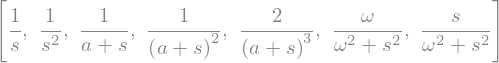

In [3]:
Fs = [L(f) for f in functions]
Fs

In [4]:
#!pip install pandas
from pandas import DataFrame

In [5]:
def makelatex(args):
    return ["$${}$$".format(sp.latex(a)) for a in args]

In [6]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$


### A transformada da derivada

$$\mathcal{L}(f'(t) u(t))=\int_{0^-}^{\infty}f'(t)e^{-st}\,dt$$

Integrando por partes, temos

$$\mathcal{L}(f'(t) u(t))=f(t)e^{-st}\bigg|_{0^-}^{\infty}+s\int_{0^-}^{\infty} f(t)e^{-st}\,dt$$

O primeiro termo do lado direito é $-f(0^-)$(porque $e^{-st}\rightarrow \infty$ quando $t\rightarrow \infty$) e a integral é simplemente a transformada de $f(t)$, ou seja, $F(s)$, e portanto

$$\mathcal{L}(f'(t) u(t))= sF(s)-f(0^-)$$

analogamente, 

$$\mathcal{L}(f''(t) u(t))= s^2F(s)-sf(0^-)-f'(0^-)$$

e

$$\mathcal{L}(f'''(t) u(t))=s^3F(s)-s^2f(0^-)-sf'(0^-)-f''(0^-)$$

e assim, sucessivamente. 

### A transformada de uma integral

$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\int_{0^-}^{\infty} \left(\int f(\tau)\,d\tau\right) e^{-st} \,dt$$

novamente, integrando por partes,


$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\frac{-1}{s}\int_{0^-}^tf(\tau)\,d\tau\,e^{-st} \bigg|_{0^-}^\infty +\frac{1}{s}\int_{0^-}^{\infty}f(t)e^{-st}\,dt$$

O primeiro termo do lado direito é nulo, enquanto a segunda integral é a transformada de Laplace de $f(t)$, portanto

$$\mathcal{L}\left(\left\{\int_{0^-}^{t} f(\tau)\,d\tau u(t)\right\}\right)=\frac{F(s)}{s}$$


### A transformada inversa: expansão em frações parciais

A transformada inversa formal é obtida através da integral (2), que é uma integral de caminho no plano complexo. Para se obter uma solução de forma mais direta, podemos usar nosso conhecimento dos pares de transformadas como os vistos acima. Entretanto, frequentemente a transformada é uma função racional $F(s)=\frac{P(s)}{Q(s)}$, onde $P(s)$ e $Q(s)$ são polinomios de $s$. As raízes de $P(s)$ são denominadas de zeros de $F(s)$ e as de $Q(s)$ são os polos de $F(s)$. Neste caso, a expansão em frações parciais leva à decomposição de $F(s)$ em termos mais simples, com fácil identificação de seus pares transformados. Dois casos são considerados:

**a) polos distintos.**

Seja $F(s)=\frac{7s-6}{s^2-s-6}=\frac{7s-6}{(s+2)(s-3)}$. Podemos expandir $F(s)$ como 

$$F(s)=\frac{7s-6}{(s+2)(s-3)}=\frac{A_1}{s+2}+\frac{A_2}{s-3}.$$

Para encontrar $A_1$, simplesmente multiplicamos a equação acima por $s+2$, e depois fazemos $s=-2$ na equação resultante, isso é

$$(s+2)F(s)=\frac{7s-6}{s-3}=A_1+A_2\frac{s+2}{s-3}$$

$$A_1=\frac{7s-6}{s-3}\bigg|_{s=-2}=4$$

Analogamente, para $A_2$ temos

$$A_2=(s-3)F(s)=\frac{7s-6}{s+2}\bigg|_{s=3}=3.$$

Portanto, $F(s)=\frac{4}{s+2}+\frac{3}{s-3}$, e daí, consultando os pares de transformada podemos encontrar $f(t)$:

$$f(t)=\left(4e^{-2t}+3e^{3t}\right)u(t).$$

**b)polos repetidos**

seja agora $F(s)=\frac{3s-1}{s(s-1)^3}$. Como antes expandimos em frações parciais como segue:

\begin{equation*}
F(s)=\frac{3s-1}{s(s-1)^3}=\frac{A_1}{s}+\frac{B_1}{(s-1)^3}+\frac{B_2}{(s-1)^2}+\frac{B_3}{s-1}.
\label{}\tag{4}
\end{equation*}

para encontrar $A_1$, fazemos como anteriormente, isto é:

$$A_1=sF(s)=\frac{3s-1}{(s-1)^3}\bigg|_{s=0}=1.$$

Já para determinação dos $B_i$s, começamos por multiplicar a equação (4) por $(s-1)^3$

\begin{equation*}
\frac{3s-1}{s}=(s-1)^3\frac{A_1}{s}+B_1+B_2(s-1)+B_3(s-1)^2,
\label{}\tag{5}
\end{equation*}

e $B_1$  é obtido como:

$$B_1=\frac{3s-1}{s}\bigg|_{s=1}=2.$$

Para determinação de $B_2$, diferenciamos (5) em função de *s*, 

\begin{equation*}
\frac{d}{ds}\left(\frac{3s-1}{s}\right)=\frac{1}{s^2}=B_2+2(s-1)B_3+\frac{d}{ds}\left((s-1)^3\frac{A_1}{s}\right),
\tag{6}
\end{equation*}

e fazendo $s=1$ obtemos $B_2$  como

$$B_2=\frac{1}{s^2}\bigg|_{s=1}=1.$$

Finalmente, diferenciamos novamente (6) para encontrar $B_3$.

$$\frac{d}{ds}\left(\frac{1}{s^2}\right)=\frac{-2}{s^3}=2B_3\rightarrow B_3=\frac{-1}{s^3}\bigg|_{s=1}=-1,$$

$$F(s)=\frac{1}{s}+\frac{2}{(s-1)^3}+\frac{1}{(s-1)^2}-\frac{1}{s-1}.$$

Com os pares 0,2,3 e 4 da tabela, encontramos $f(t)$:

$$f(t)=(1+t^2e^{t}+te^{t}-e^t)u(t)$$


### Propriedade do deslocamento no tempo:

Considere o par transformado $f(t) \leftrightarrow F(s) $. A transformada de $f(t-t_0)$ é encontrada por simples substituição $t'=t-t_0$:

$$\mathcal{L}(f(t-t_0))=\int_{0^-}^{\infty}f(t-t_0)e^{-st}\,dt=\int_{0^-}^{\infty}f(t')e^{-s(t'+t_0)}\,dt'=e^{-st_o}\int_{0^-}^{\infty}f(t')e^{-st'}\,dt'=e^{-st_0}F(s).$$

### Propriedade do deslocamento na frequência:

Para uma dada função $f(t)$ com transformada $F(s)$, a transformada de $e^{at}f(t)$ é

$$\mathcal{L}(e^{at}F(s))=\int_{0^-}^{\infty}f(t)e^{at}e^{-st}\,dt=\int_{0^-}^{\infty}f(t)e^{-(s-a)t}\,dt=F(s-a)$$









### Aplicação à Análise de Sistemas

**Exemplo** Seja o sistema representado pela equação $(D^2+5D+6)y(t)=(D+1)x(t)$, com as condições iniciais $y(0^-)=2$ e $y'(0^-)=1$, alimentado pela entrada $x(t)=e^{-4t}u(t)$.

Iniciamos fazendo a transformada da equação diferencial usando a propriedade da transformada das derivadas, e inserido as condições iniciais, isto é:

$$s^2Y(s)-sy(0^-)-y'(0^-)+5sY(s)-5y(0^-)+6Y(s)=(s+1)X(s),$$

onde $Y(s)=\mathcal{L}(y(t))$ e $\mathcal{L}(x(t))=X(s)=\frac{1}{s+4}$. Assim, 

$$(s^2+5s+6)Y(s)=(s+1)X(s)+2s+11$$

podemos escrever a equação acima como

$$Q(s)Y(s)=P(s)X(s)+2s+11.$$

E a resposta no domínio de Laplace, $Y(s)$, é dada por

$$Y(s)=\frac{P(s)}{Q(s)}X(s)+\frac{2s+11}{Q(s)}.$$

$2s+11$ é o termo devido às condições iniciais, portanto, o primeiro termo do lado direito da equação acima é a resposta de estado nulo do sistema, quando o sistema está relaxado (basta anular o segundo termo) enquanto que o segundo termo é a resposta de entrada nula (fazendo $X(s)=0$). Por superposição, a transformada inversa leva a resposta total no domínio do tempo. 

Voltando ao exemplo, $Q(s)=(s+2)(s+3)$, substituindo $Q(s)\;e\ X(s)$ na equação acima resulta em


$$Y(s)=\frac{s+1}{(s+2)(s+3)}\frac{1}{(s+4)}+\frac{2s+11}{(s+2)(s+3)},$$

$$Y(s)=\frac{2s^2+20s+45}{(s+2)(s+3)(s+4)}=\frac{A_1}{s+2}+\frac{A_2}{s+3}+\frac{A_3}{s+4},$$

de onde determinamos que $A_1=\frac{13}{2}$, $A_2=-3$ e $A_3=\frac{-3}{2}$. A resposta no domínio de Laplace é

$$Y(s)=\frac{13}{2}\frac{1}{s+2}-\frac{3}{s+3}-\frac{3}{2}\frac{1}{s+4}.$$

A resposta no domínio do tempo é encontrada com as transformadas inversas dos termos do lado direito.

$$y(t)=\left(\frac{13}{2}e^{-2t}-3e^{-3t}-\frac{3}{2}e^{-4t}\right)u(t).$$







### Aplicação ao Estudo de Transitórios

**Exemplo** Neste primeiro exemplo iremos considerar a situação em que um capacitor com uma tensão inicial $v_0$ é conectado em $t=0$ à um segundo capacitor com carga nula em paralelo com um resistor. O fato dos dois capacitores estarem em paralelo indica que as tensões devem ser as mesmas em ambos, o que exige que uma corrente impulsiva esteja presente para forçar o carregamento instantâneo do segundo capacitor. 

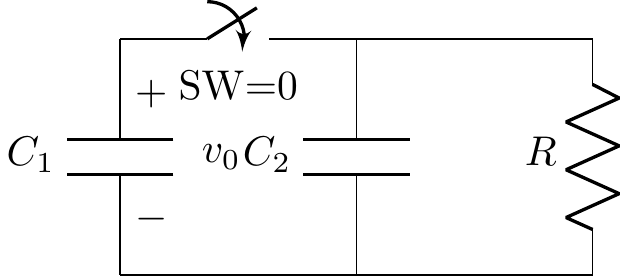

In [7]:
import lcapy as lc
s=lc.s
t=lc.t
cct=lc.Circuit("""
C1 1 0 C1 v0;down, v=v_0
SW 1 2 no;right
C2 2 0_2 C2 ;down
W 2 3;right
R 3 0_3 R;down
W 0 0_2;right
W 0_2 0_3;right
;draw_nodes=none,  label_nodes=none""")

cct.draw()


 Inicialmente faremos a análise do circuito usando a transformada de Laplace, e para torna-la mais simples iremos considerar os dois capacitores idênticos, $C_1=C_2=C$. Podemos agora obter obter a impedância equivalente para a associação em paralelo do segundo capacitor e resistor, isto é:

$$Z_p=\frac{R}{1+j\omega RC}$$
No estudo em regime permanente normalmente usa-se $s=j\omega$, e substituindo na expressão acima temos 
$$Z_p=\frac{R}{1+sRC}$$

 O capacitor inicialmente carregado pode ser modelado como sua  impedância em série com uma fonte  fonte de tensão $v_o$. A equação transformada da malha resultante é (lembrando que o acionamento da chave pode ser associado á um degrau unitário $v_0u(t)$)

$$I(s)(\frac{1}{sC}+Z_p)-\frac{V_0}{s}=0$$

$$I(s)\left(\frac{1}{sC}+\frac{R}{1+sRC}\right)=\frac{V_0}{s}$$

$$I(s)\left(\frac{1+s2RC}{sC(1+sRC)}\right)=\frac{V_0}{s}$$

$$I(s)=V_0C\frac{1+sRC}{1+s2RC}$$

O denominador e numerador de $I(s)$ possuem o mesmo grau (1) e portanto ainda não podem ser expandidos em frações parciais. Antes, é necessário fazer a divisão polinomial, de forma que 

$$\frac{1+sRC}{1+s2RC}=\frac{1}{2}+\frac{\frac{1}{2}}{1+s2RC}$$

Substituindo este resultado na equação de $I(s)$, temos

$$I(s)=\frac{V_0C}{2}\left(1+\frac{1}{1+s2RC}\right)=\frac{V_0C}{2}\left(1+\frac{\frac{1}{2RC}}{s+\frac{1}{2RC}}\right)$$

de forma que a corrente $i(t)$ é:

$$i(t)=\frac{v_0C}{2}\left(\delta(t)+\frac{1}{2RC}e^{-\frac{t}{2RC}}\right)$$

onde a parcela impulsiva da corrente é responsável pela transferência instantânea da metade da carga do capacitor $C_1$ para o capacitor $C_2$, equalizando suas tensões a partir do momento que o circuito é chaveado, como será mostrado ao final deste exemplo. 

Vamos agora refazer a análise com o programa *Lcapy*, mantendo inicialmente a generalidade do circuito original.

In [8]:
cct_ivp=cct.convert_IVP(0);

C:\Users\vanti\OneDrive\Desktop\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\lcapy\netlist.py:80: UserWarning: Missing initial conditions for C2
  warn('Missing initial conditions for %s' %


In [9]:
I=cct_ivp.C1.i(s).simplify().ZPK()
I

-C₁⋅C₂⋅v₀  ⎛     1  ⎞
──────────⋅⎜s + ────⎟
 C₁ + C₂   ⎝    C₂⋅R⎠
─────────────────────
            1        
   s + ───────────   
       R⋅(C₁ + C₂)   

In [10]:
I(t)

          ⎛        -t            ⎞            
          ⎜    ───────────       ⎟            
          ⎜    R⋅(C₁ + C₂)       ⎟            
          ⎜C₁⋅ℯ                  ⎟            
-C₁⋅C₂⋅v₀⋅⎜─────────────── + δ(t)⎟            
          ⎜            2         ⎟            
          ⎝C₁⋅C₂⋅R + C₂ ⋅R       ⎠            
───────────────────────────────────  for t ≥ 0
              C₁ + C₂                         

Fazendo $C_1=C_2=C$ a expressão acima é idêntica a resultante de nossa análise anterior. A tensão sobre o capacitor $C_2$ é

In [11]:
cct_ivp.C2.v

           -t                
       ───────────           
       R⋅(C₁ + C₂)           
C₁⋅v₀⋅ℯ                      
──────────────────  for t ≥ 0
     C₁ + C₂                 

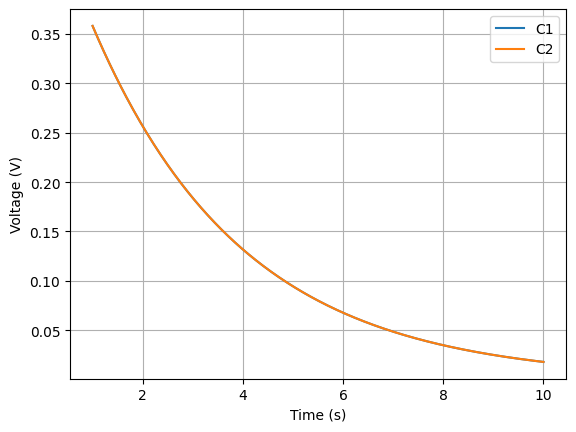

In [12]:
ax=cct_ivp.C1.v.subs({'C1':0.5,'C2': 0.5, 'R':3, 'v0': 1}).plot((1,10),label='C1')
ax=cct_ivp.C2.v.subs({'C1':0.5,'C2': 0.5, 'R':3, 'v0': 1}).plot((1,10),axes=ax,label='C2')
ax.legend();

O capacitor $C_1$, no gráfico acima possui uma tensão inicial de 1 V, enquanto que $C_2$ está inicialmente descarregado, e portanto, com tensão inicial nula sobre ele. Quando a chave é fechada a metade da carga de $C_1$ é instantaneamente transferida para $C_2$, de forma que em $t=0$ ambos os capacitores possuem 0.5 V sobre eles, tensão esta que decai exponencialmente a partir deste momento. 

**Exemplo** Neste segundo exemplo iremos usar o programa *Lcapy* para simular um circuito $RC$ série conectado em $t=0$ à uma fonte de tensão senoidal. O programa permite que o chaveamento seja modelado multiplicando a fonte pela função degrau, ao invés de uma chave,  como mostrado abaixo.

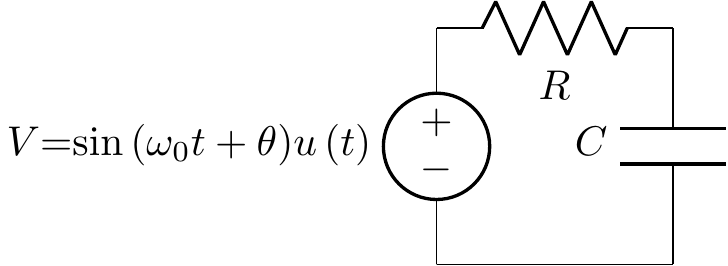

In [13]:
import lcapy as lc
s=lc.s
t=lc.t
cct=lc.Circuit("""
V 1 0 {sin(omega_0*t+theta)*u(t)};down
R 1 2 R;right
C 2 0_2 C;down
W 0 0_2;right
; draw_nodes=none,  label_nodes=none""")
cct.draw()


In [14]:
cct.R.i(s).simplify().ZPK()

       sin(θ) ⎛  ω₀      ⎞      
     s⋅──────⋅⎜────── + s⎟      
         R    ⎝tan(θ)    ⎠      
────────────────────────────────
⎛     1 ⎞                       
⎜s + ───⎟⋅(-ⅉ⋅ω₀ + s)⋅(ⅉ⋅ω₀ + s)
⎝    C⋅R⎠                       

In [15]:
cct.R.i.simplify()

⎛            t                           t                                    
⎜           ───                         ───                                   
⎜ 2  2   2  C⋅R                         C⋅R                                   
⎝C ⋅R ⋅ω₀ ⋅ℯ   ⋅sin(ω₀⋅t + θ) + C⋅R⋅ω₀⋅ℯ   ⋅cos(ω₀⋅t + θ) - C⋅R⋅ω₀⋅cos(θ) + si
──────────────────────────────────────────────────────────────────────────────
                                        ⎛ 2  2   2    ⎞                       
                                      R⋅⎝C ⋅R ⋅ω₀  + 1⎠                       

    ⎞  -t      
    ⎟  ───     
    ⎟  C⋅R     
n(θ)⎠⋅ℯ   ⋅u(t)
───────────────
               
               

A resposta acima terá um período transitório, indicado no termo exponencial, e será estabilizada em regime em uma função senoidal. Por outro lado, se o ângulo de fase $\theta$ é escolhido de forma que $\frac{\omega_0}{\tan(\theta)}=\frac{1}{CR}$, o zero da na expressão da corrente $I(s)$ será igual à um dos polos, cancelando-se mutuamente, e a resposta agora será uma senoide pura, sem o termo transitório, como mostrado abaixo (para $\omega$=100 rad/s).

In [16]:
I=lc.current(s*lc.sin('theta')/'R')/(s**2+100**2)
I

   s⋅sin(θ)   
──────────────
  ⎛ 2        ⎞
R⋅⎝s  + 10000⎠

In [17]:
I.ILT()

sin(θ)⋅cos(100⋅t)           
─────────────────  for t ≥ 0
        R                   

**Exemplo** Neste último exemplo um circuito *LC* é composto de dois indutores e um capacitor.  A fonte é conectada ao circuito através de uma chave que fecha em $t=0$ e portanto inicialmente não existe corrente circulando. A a chave é aberta em seguida, de foma que a alimentação consiste de um pulso retangular isolado de tensão. O pulso, com duração de $43\mu s$,  é descrito por meio de duas funções degrau como mostrado abaixo. A resposta é a tensâo sobre o indutor $L_2$ de saída.

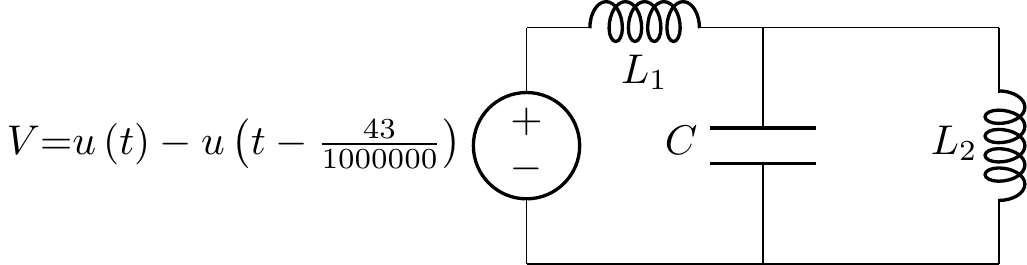

In [18]:
import lcapy as lc
s=lc.s
t=lc.t
cct = lc.Circuit("""
V 1 0 {u(t)-u(t-43e-6)}; down
L1 1 2 ; right
C 2 0_2; down
W 2 3; right
L2 3 0_3;down
W 0 0_2;right
W 0_2 0_3;right
;draw_nodes=none,  label_nodes=none""")

cct.draw()

In [19]:
cct.L2.v(s).simplify()


   ⎛   43⋅s     ⎞   -43⋅s 
   ⎜ ───────    ⎟  ───────
   ⎜ 1000000    ⎟  1000000
L₂⋅⎝ℯ        - 1⎠⋅ℯ       
──────────────────────────
   ⎛         2          ⎞ 
 s⋅⎝C⋅L₁⋅L₂⋅s  + L₁ + L₂⎠ 

In [20]:
cct.L2.v.simplify()

   ⎛                                                   ⎛                      
   ⎜⎛                       ⎛     _________  ⎞⎞        ⎜                      
   ⎜⎜                       ⎜ t⋅╲╱ L₁ + L₂   ⎟⎟        ⎜                      
L₂⋅⎜⎜L₁ + L₂ - (L₁ + L₂)⋅cos⎜────────────────⎟⎟⋅u(t) - ⎜L₁ + L₂ - (L₁ + L₂)⋅co
   ⎜⎜                       ⎜     ____   ____⎟⎟        ⎜                      
   ⎝⎝                       ⎝√C⋅╲╱ L₁ ⋅╲╱ L₂ ⎠⎠        ⎝                      
──────────────────────────────────────────────────────────────────────────────
                                                                  2           
                                                         (L₁ + L₂)            

 ⎛  _________ ⎛       43  ⎞⎞⎞               ⎞
 ⎜╲╱ L₁ + L₂ ⋅⎜t - ───────⎟⎟⎟               ⎟
 ⎜            ⎝    1000000⎠⎟⎟  ⎛       43  ⎞⎟
s⎜─────────────────────────⎟⎟⋅u⎜t - ───────⎟⎟
 ⎜          ____   ____    ⎟⎟  ⎝    1000000⎠⎟
 ⎝     √C⋅╲╱ L₁ ⋅╲╱ L₂     ⎠⎠               ⎠
────────────

Do resultado acima podemos inferir que o circuito funciona como um oscilador com frequência dada por
$$\omega_0^2=\frac {L_1+L_2}{L_1L_2C}$$

Usando valores $L_1=40\,mH, \, L_2=5\,mH$ e $ C=0.01 \mu F$, a  frequência  de oscilação é  $\omega_0=150000 \,rad/s$ com período
$$T=\frac{2\pi}{\omega_0}=41,9\,\mu s.$$

In [21]:
cct_num=cct.subs({'L1':40e-3,'L2':5e-3,'C':0.01e-6})

In [22]:
cct_num.L2.v.simplify_terms()

                           ⎛   ⎛           129⎞    ⎞  ⎛       43  ⎞
                           ⎜cos⎜150000⋅t - ───⎟ - 1⎟⋅u⎜t - ───────⎟
(1 - cos(150000⋅t))⋅u(t)   ⎝   ⎝            20⎠    ⎠  ⎝    1000000⎠
──────────────────────── + ────────────────────────────────────────
           9                                  9                    

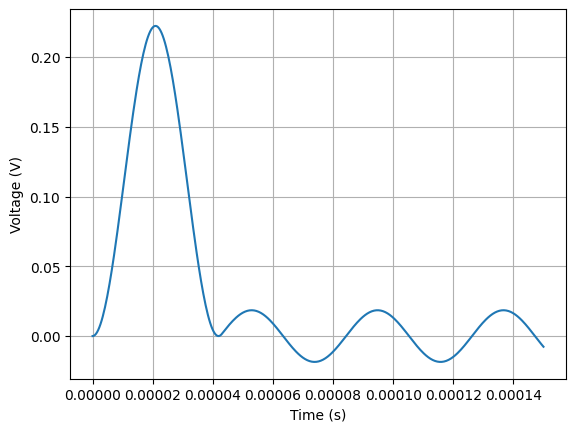

In [23]:
cct_num.L2.v.plot((0,150e-6));